# 7 Island Count

Take a table (rows and columns) where immediately adjacent row-column-values are connected:<br>
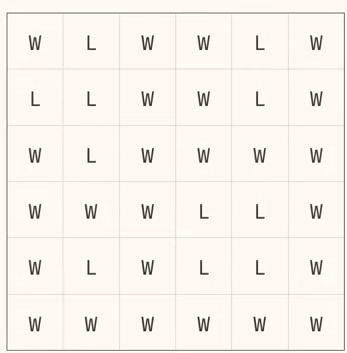<br>
Can visualise it as such:<br>
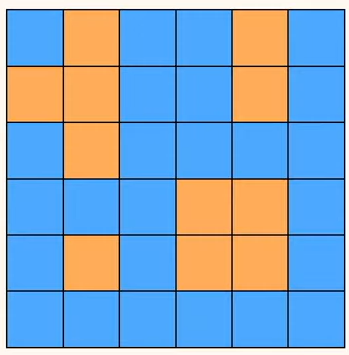<br>
In this, our function should return 4; 4 islands.<br>
Should think of it as if we have a graph. Call it a *grid-graph*.<br>
Think of it as having indices, where it has row-indices along the left-hand side and column-indices along the top.<br>
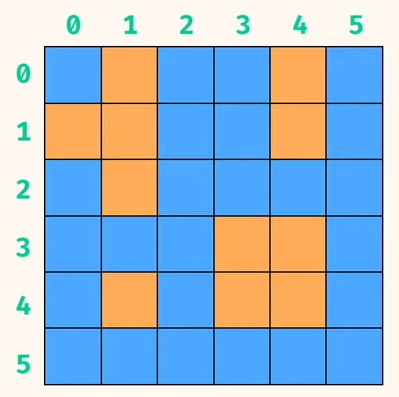<br>
For each point, we can assign it an index (the same way one would use .iloc with pandas):<br>
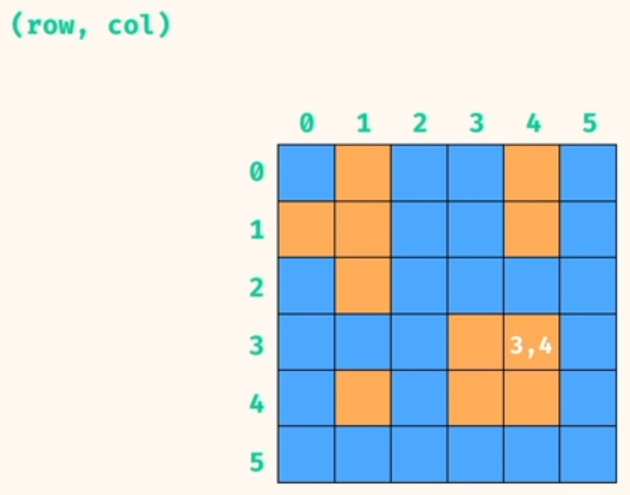<br>
Given any position in the grid, there are at most 4 neighbours in the up, down, left, and right directions.<br>
To move to each, it's a matter of adding or subtracting one to the row or column index.<br>
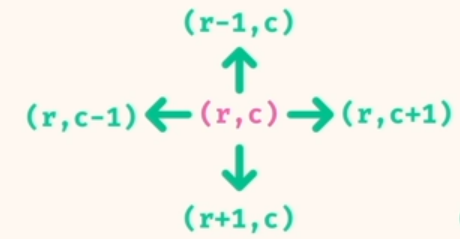

To find out what we want, we'll need:
* Iterative code, *nested loops* to:
    * Iterate through every row-column.
    * Then every island with depth traversal whenever we find an island.
* To next row when we finish a row.
* Visited set, to prevent infinite loops in island searches.
* Value checking for the position; is it an water or land?

Complexity:<br>
Time: $O(rc)$<br>
Space: $O(rc)$

## Code

What is nice with this, is that Python has tuples whereas JavaScript doesn't.<br>Alvin in the video guides use JavaScript, which doesn't have tuples, so he has to do some fiddly things with strings.<br>With Python, you can use tuples instead.<br><br>Using more annotations here because the content is getting gradually more challening.

In [8]:
s = set()
s.add((1,3))
(1,3) in s
(1,3)[0]

1

In [69]:
def explore_island(grid, row, col, visited):
    # check if where you are is in bounds
    row_in_bounds = row >= 0 and row < (len(grid))
    col_in_bounds = col >= 0 and col < (len(grid[0]))
    
    if (not row_in_bounds or  not col_in_bounds):
        return False
    
    # check if the position you are on is land
    if grid[row][col] =='W':
        return False
    
    # check if where you are has been visited
    pos = (row,col)
    if pos in visited:
        return False
    # only now, add the position to to visited
    visited.add(pos)
    
    # explore up
    explore_island(grid, row-1, col, visited)
    # explore down
    explore_island(grid, row+1, col, visited)
    # explore right
    explore_island(grid, row, col-1, visited)
    # explore left
    explore_island(grid, row, col+1, visited)
    
    return True
    

def island_count(grid):
    visited = set()
    count=0
    for row in range(0,len(grid)):
        for col in range(0,len(grid[0])):
            if (explore_island(grid,row,col,visited))==True:
                count+=1
    return count

**Checking the Code**

In [42]:
grid = [
    ['W','L','W','W','W'],
    ['W','L','W','W','W'],
    ['W','W','W','L','W'],
    ['W','W','L','L','W'],
    ['W','W','W','L','L'],
    ['L','L','W','W','W']
]

In [70]:
island_count(grid=grid)

3